# Exploratory Data Analysis Project

- Author: Cole Nollette

- Date: 2/12/24

- Design/Purpose: Project 6 I will be creating my own exploratory data analysis (EDA) project using GitHub, Git, Jupyter, Pandas, Seaborn, and other data analytic tools. The notebook will tell a story based on data and visualizations! The information I am presenting is on health expenses per country and their relation to life expectancy! This data dates back to 1970!

In [187]:
# Import Dependencies and Environment Setup

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Step 1: Data Acquisition

- I am pulling a set of data centered around health expenses per country, through the years 1970 until 2020

In [188]:
# Data Acquisition
df = sns.load_dataset('healthexp')

# Inspect first rows of the DataFrame
print(df.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


In [189]:
# Data Inspection
# Displaying the first 20 rows of the 'HealthExp' data
print(df.head(20))
print(df.shape)
print(df.dtypes)

    Year        Country  Spending_USD  Life_Expectancy
0   1970        Germany       252.311             70.6
1   1970         France       192.143             72.2
2   1970  Great Britain       123.993             71.9
3   1970          Japan       150.437             72.0
4   1970            USA       326.961             70.9
5   1971         Canada       313.391             72.8
6   1971        Germany       298.251             70.8
7   1971  Great Britain       134.172             71.9
8   1971          Japan       163.854             72.9
9   1971            USA       357.988             71.2
10  1972        Germany       337.364             71.0
11  1972          Japan       185.390             73.2
12  1972            USA       397.097             71.2
13  1973        Germany       384.541             71.3
14  1973          Japan       205.778             73.4
15  1973            USA       439.302             71.4
16  1974        Germany       452.744             71.5
17  1974  

In [190]:
# Initial Descriptive Statistic
print(df.describe())

              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


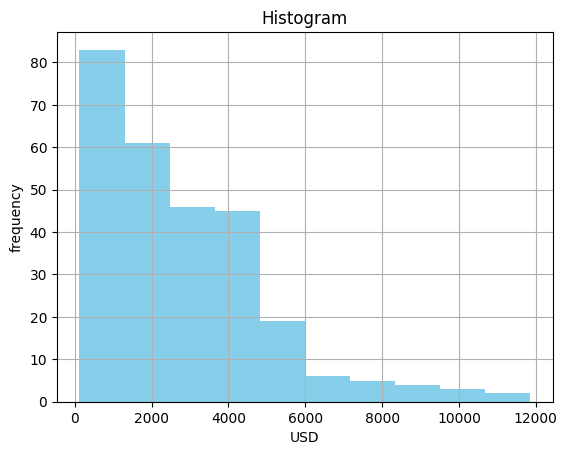

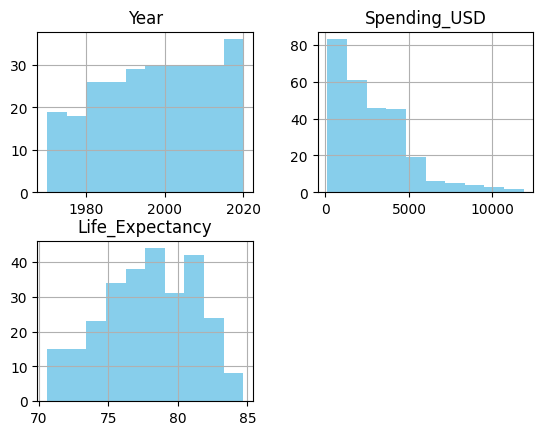

In [191]:
# Initial Data Distribution for Numerical Columns
df['Spending_USD'].hist(color='skyblue')

# Label the Graph
plt.xlabel('USD')
plt.ylabel('frequency')
plt.title('Histogram')

# Inspect historgrams for all numerical columns 
df.hist(color='skyblue')

# Show all plots
plt.show()

# Histogram Analysis

- The data here is showing an increase in life expectancy, which is great to see! Sadly, as we all would assume, it is also showing a rapid increase in the cost of health expenses as the life expectancy increases! 

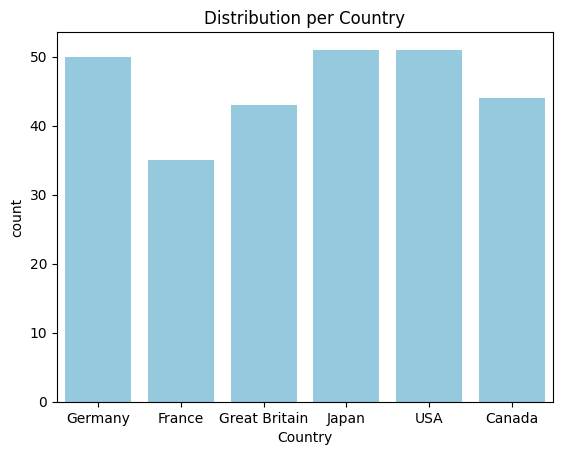

In [192]:
# Initial Data Distribution for Categorical Columns
df['Country'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, color='skyblue', data=df)
    plt.title(f'Distribution per {col}')
    plt.show()
    

# Show all plots
plt.show()

## Categorical Columns Analysis

- This graph is simply showing what our upcoming graphs will display.  As you can see above most of our dataset is centered around the US, but does give great information and comparable data to other countries as well.

In [193]:
# Renaming a column
df.rename(columns={'Spending_USD': 'Dollar Amount', 'Life_Expectancy': 'Life Expectancy'}, inplace= True)

# Adding a column 'Spending_Type' based on cost of total spending
# Categorize spending as either high or low
df['Spending Type']= pd.cut(df['Dollar Amount'], bins=[0, 2000, df['Dollar Amount'].max()], labels=['Low', 'High'])                           

# Display the new dataset column
print(df.head(275))

     Year        Country  Dollar Amount  Life Expectancy Spending Type
0    1970        Germany        252.311             70.6           Low
1    1970         France        192.143             72.2           Low
2    1970  Great Britain        123.993             71.9           Low
3    1970          Japan        150.437             72.0           Low
4    1970            USA        326.961             70.9           Low
..    ...            ...            ...              ...           ...
269  2020        Germany       6938.983             81.1          High
270  2020         France       5468.418             82.3          High
271  2020  Great Britain       5018.700             80.4          High
272  2020          Japan       4665.641             84.7          High
273  2020            USA      11859.179             77.0          High

[274 rows x 5 columns]


# Adding and Renaming columns

- I went ahead and renamed some of the columsn above to simply clean up some of the data and make it easier on the eyes.

- The above dataset also has a new column called "Spending Type". This was added to show when the health expense spending crossed over the $2000 spending mark!  The U.S. looks to lead the category in spending, but I will talk more about that below.

# Data Visualizations! Breaking down the data!

-  My Goal here is to leave you with a question... "Does the rise in health expense correlate to life expectancy"


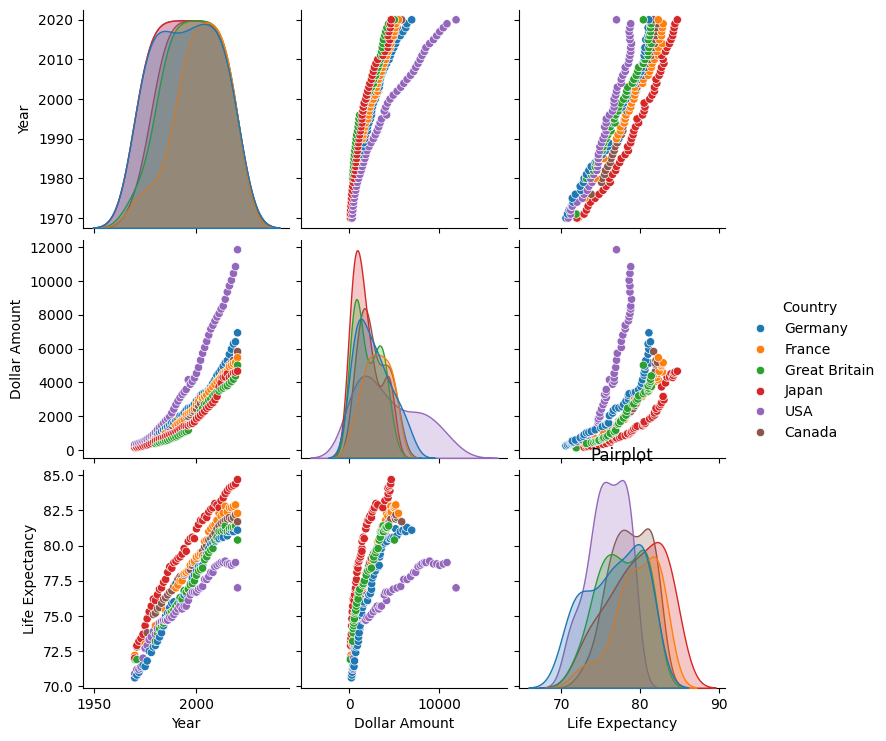

In [194]:
# Data Visualizations

sns.pairplot(df, hue='Country')

# Label the Graph
plt.title('Pairplot')
plt.show()

# Analysis of the Pairplot

- Each graph is showing very similar trends

- Life expectancy is growing through the years! Great news!

- Healthy expenses are also growing through the years, and quickly surpassing that of life expectancy! Troublesome news!

Text(0.5, 1.0, 'Life Expectancy Per Country')

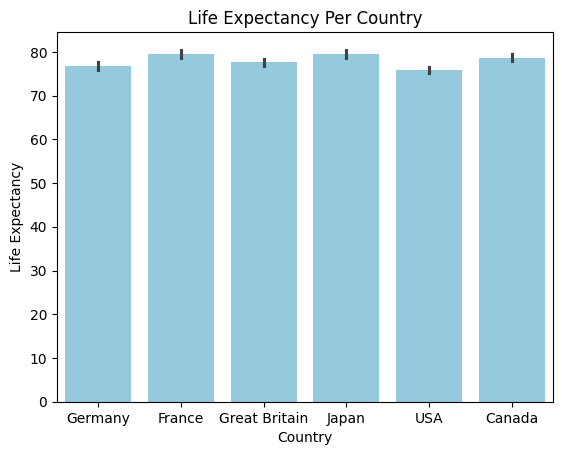

In [195]:
# Barplot

sns.barplot(x='Country', y='Life Expectancy', data=df, color='skyblue')

# Label the Graph
plt.title('Life Expectancy Per Country')

# Barplot Analysis

- This is probably the simplest graph on this entire EDA, but also the most fascinating to me!  Life expectancy looks to be very similar between all the countries represented! Which leads us to further questions, do things such health expense look as similar between the countries?

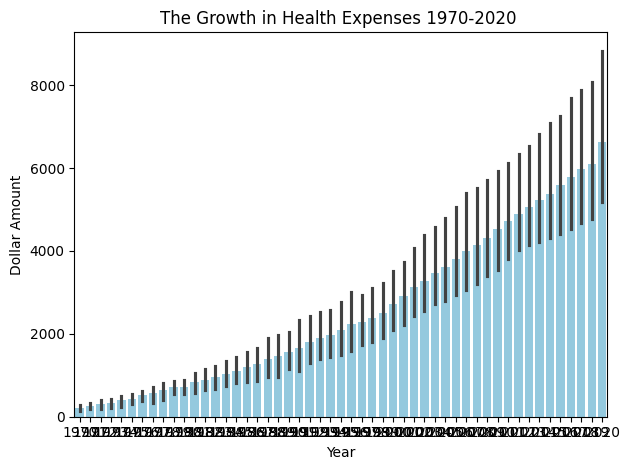

In [196]:
# Barplot
sns.barplot(x='Year', y='Dollar Amount', data=df, color='skyblue')

# Label the Graph
plt.xlabel('Year')
plt.ylabel('Dollar Amount')
plt.title('The Growth in Health Expenses 1970-2020 ')
plt.tight_layout()

# Barplot #2 Analysis

- Each year the Health Expense dollar amount continues to grow! 2020 was a new high for every country!

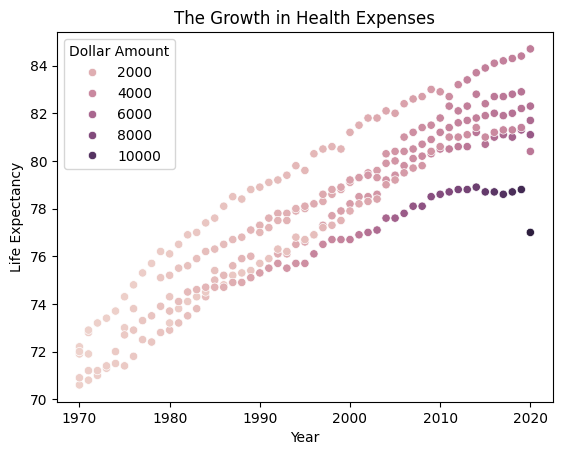

In [197]:
# Scatterplot

sns.scatterplot(x='Year', y='Life Expectancy', hue='Dollar Amount', data=df,)

# Label the Graph
plt.ylabel('Life Expectancy')
plt.title('The Growth in Health Expenses')
plt.show()

# Scatterplot Analysis

- The growth in Health Expenses grow

- As you can see from the scatterplot above, I went ahead and eliminated the different countries and wanted to see a graph that should the year and life expectancy.

- The graph shows a very steady increase in health expense as time continues

- As life expectancy grows, so does health expense! Take a deeper look though! The graph seems to be slowly tappering off with the smallest plateau in life expectancy, but that does not effect cost whatsoever! We're learning that the expenses are actually growing faster than life expectancy!


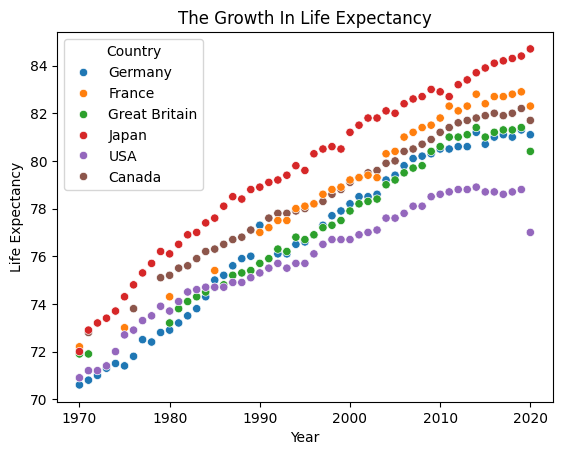

In [198]:
# Scatterplot

sns.scatterplot(x='Year', y='Life Expectancy', hue='Country', data=df)

# Label the Graph
plt.ylabel('Life Expectancy')
plt.title ('The Growth In Life Expectancy')
plt.show()

# Scatterplot Analysis #2

- This second scatterplot I wanted to show the difference between each country

- You can now compare the two scatterplots to see that the US actually has the lowerst life expectancy, YET the highest cost of health expenses!

- Japan is leading in life expectancy, but their spending on health expenses seems to be somwhere in the lower range.

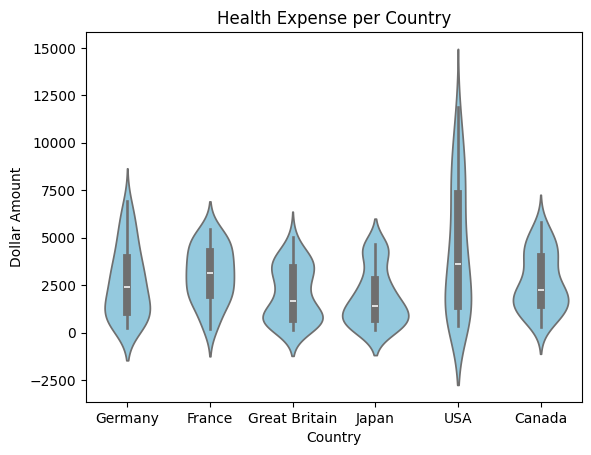

In [199]:
sns.violinplot(x='Country', y='Dollar Amount', color='skyblue', data=df)

# Label the Graph
plt.title('Health Expense per Country')
plt.show()

# Violin Plot

- This violin plot was used to show the tremendous growth in health expenses in the USA! Other countries are seeing a growth in health expense as well, but not on pace of the USA.

# Conclusion:

- This dataset was very informative and interesting to dive into! Life expectancy amongst all nations has been on the rise since 1970!  Health expense has also been on the rise and slowly out pacing life expectancy as of late! When taking a closer look you can actually see that the USA has had a tremendous amount of health expense rise while their life expectancy actually went DOWN!! On the contrary, Japan has the greatest life expectancy and a health expense that falls somewhere in the middle of the range. To conlcude we answer our goal question, "Does the rise in health expense correlate to life expectancy" and that answer would be NO!